# Building Machine Learning Models - Complete Workflow   

<span style='color:crimson'> <span style="font-size:19px;"> **Machine Learning Algorithms Selection: Random Forest Regressor & Gradient Boosting Regressor**

For the prediction of petrophysical properties, such as porosity, permeability and water saturation, Random Forest Regressor and Gradient Boosting Regressor are suitable.

They are Ensemble Based Tree Methods; they are based on the generation of Decision Trees.

We use Regression Models since we want to predict a continuous variable. 

Advantages of the 2 regression models, since they are based on Decision Trees:
1. They do not need the normalization or scaling of the original dataset;
2. They are not sensitive to outliers, thus, outliers detection and removal are not required. 

<span style='color:crimson'> <span style="font-size:19px;"> **Importing Models and Required Dependencies** 

In [1]:
%pip install --upgrade scikit-learn==1.2.2                                                        # 1.2.2 is the latest version of scikit learn library
%pip install qbstyles
from qbstyles import mpl_style 

# Importing the models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing the dependencies (components required, by the project, to avoid runtime errors)
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches                                                             
import pickle

from qbstyles import mpl_style
mpl_style(dark=False)  


from sklearn.model_selection import train_test_split                                              # train_test_split is a function
from sklearn.model_selection import cross_val_score, KFold                                        # cross_val_score and KFold are functions

from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, mean_absolute_error # regression metrics

from matplotlib_inline.backend_inline import set_matplotlib_formats                               # The package "Matplotlib Inline Back-end" provides support for Matplotlib to display figures directly inline
set_matplotlib_formats('svg')                                                                     # "svg" stands for "scalable vector graphic". The plot can be scaled without compromising its quality

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<span style='color:crimson'> <span style="font-size:19px;"> **Loading the Well Log Data (WELL 1-BRSA-871-MG)**   

In [2]:
# Load the csv well log data to Pandas DataFrame 
df = pd.read_csv("well_log_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9496 entries, 0 to 9495
Data columns (total 83 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH      9496 non-null   float64
 1   DEPTH1     9496 non-null   float64
 2   Vp         9496 non-null   float64
 3   BS         9496 non-null   float64
 4   CS         9496 non-null   float64
 5   TENS       9496 non-null   float64
 6   ETIM       9496 non-null   float64
 7   BHPR       9496 non-null   float64
 8   RT         9496 non-null   float64
 9   SP         9496 non-null   float64
 10  SPAR       9496 non-null   float64
 11  DTCO3      9496 non-null   float64
 12  PXND_HILT  9496 non-null   float64
 13  RHGX_HILT  9496 non-null   float64
 14  UMA_HILT   9496 non-null   float64
 15  HPATT      9496 non-null   float64
 16  HLRGB      9496 non-null   float64
 17  PHIE_HILT  9496 non-null   float64
 18  RMFA_HILT  9496 non-null   float64
 19  RO_HILT    9496 non-null   float64
 20  VCL_HILT

<span style='color:crimson'> <span style="font-size:19px;"> **Specifying Predictors & Target** 

The target of the RF and GB regression algorithms is to build a model which is able to predict a measured or calculated feature (dependent continuous variable) starting from a set of input features (independent variables).

The Independent Variable(s), or called Predictor(s), is(are) the Input to the model.  

The Dependent Variable(s), or called Response(s), is(are) the Output of the model. 

In this case, for Effective Porosity (PHIE_HILT) Prediction, a calculated feature, the following Input variables are considered:

GR          .gAPI  : Gamma-Ray

NPHI        .m3/m3 : Thearmal Neutron Porosity (Ratio Method) 

RHGX_HILT   .g/cc : HILT Grain Density 

In [4]:
predictors = ["GR", "NPHI","RHGX_HILT"]  

In [5]:
X = df[predictors]
y = df["PHIE_HILT"]       

<span style='color:crimson'> <span style="font-size:19px;"> **Training & Test Well Log Datasets** 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To split the data into training and test datasets we use the "train_test_split" function.

We consider the following parameters:
1. X,y: are the variables to be splitted;
2. train_size = None: the value is automatically set to the complement of the test size (0.8);
3. test_size = 0.2 (20%): it represents the proportion of the dataset to include in the test split;
4. shuffle = True (by default): whether or not to shuffle the data before splitting;
5. random_state = 42: pass an int, we chose 42, for reproducible output across multiple function calls. It has    to be set only when "shufle=True".

In [7]:
# Shape of the training and test datasets 
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9496, 3) (7596, 3) (1900, 3) (7596,) (1900,)


<span style='color:crimson'> <span style="font-size:19px;"> **Cross-Validation of the Models** 

We consider only the training dataset and we have to cross-validate the two models.

Notably, we consider the K-Fold Cross-Validation technique.

According to this technique, the training dataset (80% of the original dataset) is split randomly, into k number of subsets or called folds. The model is trained on k-1 folds of training set and evaluated on the remaining fold of validation set.
This procedure is iterated for k-times; for each iteration, the model is evaluated on a different validation
set. 

This technique is used in order to obtain an "average accuracy" of our models in a more reliable way. Instead of a simple "Training and Test phase", we have a "Training, Validation and Test phase". 

In this case, the accuracy of the models is given by the "Coefficient of Determination" which is a measure that assesses the ability of a model to predict. 

Note: this step can be skipped since it will be carried out again through the Optimization Process.

<span style='color:crimson'> <span style="font-size:19px;"> **K-Fold Cross-Validation** 

We create the two models without specifying any "hyperparameter" and by means of the "cross_val_score" function we can split the training dataset into different k-folds; since we are dealing with a large training dataset, we choose k=10. This function allows also to calculate the "accuracy" of the models for each iteration.
Thus, we obtain 10 accuracy values and we can calculate the "average accuracy" for each model. 

Average Accuracy = (Accuracy iteration 1 + ... + Accuracy iteration 10)/10 

In [8]:
# Create the models 

# Random Forest Model (RF)
rf_model = RandomForestRegressor(random_state=42) 

# Gradient Boosting Model (GB)
gb_model = GradientBoostingRegressor(random_state=42) 

For the "cross_val_score" function, we consider the following parameters:
1. model;
2. training dataset;
3. number of folds, cv=10;
4. regression metrics that we want to calculate, (Coefficient of Determination) scoring='r2'.

In [9]:
# RANDOM FOREST MODEL 

# Number of folds 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross validation score
cv_score_rf = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='r2')
cv_score_rf = np.round(cv_score_rf,4 )         # To have only 4 decimal places; cv_score_rf array 
print(cv_score_rf)                             # 10 accuracy values are printed 

# To obtain an average value of r2
mean_r2_rf = sum(cv_score_rf)/len(cv_score_rf) # len(cv_score_rf)=10
mean_r2_rf = mean_r2_rf*100                    # To convert the average value into a percentage value
mean_r2_rf = round(mean_r2_rf,2)               # To have only 2 decimal places 
print(mean_r2_rf) 

[0.9832 0.9789 0.9882 0.9794 0.9775 0.976  0.981  0.987  0.9351 0.9826]
97.69


In [11]:
# GRADIENT BOOSTING MODEL 

# Number of folds 
kf = KFold(n_splits=10, shuffle=True, random_state=42) 

# Cross validation score
cv_score_gb = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='r2')
cv_score_gb = np.round(cv_score_gb,4)          # To have only 4 decimal places; cv_score_rf array
print(cv_score_gb)                             # 10 accuracy values are printed

# To obtain an average value of r2
mean_r2_gb = sum(cv_score_gb)/len(cv_score_gb) # len(cv_score_rf)=10
mean_r2_gb = mean_r2_gb*100                    # To convert the average value into a percentage value 
mean_r2_gb = round(mean_r2_gb, 2)              # To have only 2 decimal places
print(mean_r2_gb) 

[0.9772 0.9792 0.9824 0.9617 0.9658 0.9743 0.9706 0.9795 0.9061 0.9714]
96.68


In order to compare the models, at the same time, it is better to write a "for loop" and to define a function "compare_models_cv(). This is equivalent to what has been done before. 

In [12]:
# Create Models 
# Random Forest Model (RF)
rf_model = RandomForestRegressor(random_state=42)  

# Gradient Boosting Model (GB)
gb_model = GradientBoostingRegressor(random_state=42) 

# List of models 
models = [rf_model, gb_model]

# Number of folds 
kf = KFold(n_splits=10, shuffle=True, random_state=42) 

# For loop 
def compare_models_cv():  
    for model in models:
        r2_score = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
        r2_score = np.round(r2_score,4)
        mean_r2 = sum(r2_score)/len(r2_score)
        mean_r2 = mean_r2*100
        mean_r2 = round(mean_r2,2)

        print('Coefficient of Determination for', model, '=', r2_score)
        print('Average % Coefficient of Determination for', model, '=', mean_r2)
        print('============================================')

In [13]:
# Call the function 
compare_models_cv() 

Coefficient of Determination for RandomForestRegressor(random_state=42) = [0.9832 0.9789 0.9882 0.9794 0.9775 0.976  0.981  0.987  0.9351 0.9826]
Average % Coefficient of Determination for RandomForestRegressor(random_state=42) = 97.69
Coefficient of Determination for GradientBoostingRegressor(random_state=42) = [0.9772 0.9792 0.9824 0.9617 0.9658 0.9743 0.9706 0.9795 0.9061 0.9714]
Average % Coefficient of Determination for GradientBoostingRegressor(random_state=42) = 96.68


<span style='color:crimson'> <span style="font-size:19px;">  **Hyperparameters Tuning (RandomizedSearchCV) - Optimization Problem** 

We re-consider the training dataset and we use the Randomized Search Cross Validation technique to determine the optimal hyperparameter values for the Random Forest & Gradient Boosting models. 

We start implementing the Random Search by defining a grid of hyperparameters that will be randomly sampled when calling the function "RandomizedSearchCV()". Moreover, the models are cross-validated, for the second time, on these random combinations of hyperparameters. 

The parameters of the "RandomizedSearchCV()" function are:
1. The model without any hyperparameter;
2. The grid of hyperparameters;
3. The number of combinations to be randomly sampled (n_iter=20);
4. The number of k-folds into which the training dataset is splitted (cv=10).

The techinque returns the optimal combination of hyperparameters, for the two models. 

In [14]:
# Import the dependencies 
from sklearn.model_selection import RandomizedSearchCV

**RANDOM FOREST HYPERPARAMETERS GRID**

We consider the following hyperparameters:
1. n_estimators = number of trees in the forest;
2. max_depth = the maximum depth of the tree;
3. criterion = the function that measures the quality of the split.

In [15]:
# RANDOM FOREST Hyperparameters

# Number of trees to be used
rf_n_estimators = [100, 150, 200, 250, 300, 350, 400]

# Maximum number of levels in tree
rf_max_depth = [5, 10, 15, 20, 25]

# Criterion to split on
rf_criterion = ['squared_error']                         # "squared_error" is by default. It is optional

# Create the grid 
rf_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'criterion': rf_criterion}

In [16]:
# Model to be tuned 
rf_model = RandomForestRegressor(random_state=42)        # Shuffle=True by default

# Create the random search Random Forest 
rf_random = RandomizedSearchCV(rf_model, rf_grid, n_iter=20, cv=10, random_state=42)

# Fit the random search model 
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=42)

In [17]:
# Print the results 
rf_random.cv_results_

{'mean_fit_time': array([5.10546908, 3.8323797 , 3.56217668, 1.43300869, 1.90677917,
        2.21325302, 4.40536103, 3.29561367, 1.41247268, 2.49309177,
        1.88414416, 5.09431405, 0.54609149, 1.63954878, 3.11790302,
        5.66164873, 1.91266594, 2.82511005, 0.82026811, 1.09648738]),
 'std_fit_time': array([0.04527248, 0.03499517, 0.05007574, 0.01488653, 0.01649415,
        0.02083695, 0.0521643 , 0.01196565, 0.0021821 , 0.01319616,
        0.00961176, 0.04400451, 0.00120974, 0.00800547, 0.00855093,
        0.0385521 , 0.00586261, 0.01275288, 0.00274577, 0.0107564 ]),
 'mean_score_time': array([0.06075795, 0.03483343, 0.04267752, 0.01791992, 0.02033   ,
        0.0277473 , 0.04534667, 0.02991674, 0.01334314, 0.02639019,
        0.01749251, 0.06354632, 0.00595315, 0.01608775, 0.03273051,
        0.06731892, 0.01859069, 0.02580352, 0.00850327, 0.01103139]),
 'std_score_time': array([1.39337782e-03, 9.18611049e-04, 6.25273324e-04, 3.98808341e-04,
        3.73956388e-04, 9.61898918e-

In [18]:
# Print the best hyperparameters
# Combination that gives the highest accuracy (coefficient of determination) during the cross-validation
best_parameters = rf_random.best_params_
print(best_parameters) 

{'n_estimators': 250, 'max_depth': 20, 'criterion': 'squared_error'}


In [19]:
# Print the accuracy we get for the "best combination"
highest_accuracy = rf_random.best_score_ 
highest_accuracy = round(highest_accuracy,4)
highest_accuracy = highest_accuracy*100
print('Coefficient of Determination for the Random Forest =', highest_accuracy)

Coefficient of Determination for the Random Forest = 97.83


In [20]:
# Load the results to Pandas DataFrame 
results = pd.DataFrame(rf_random.cv_results_) 
results.head(20)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        5.105469      0.045272         0.060758        0.001393   
1        3.832380      0.034995         0.034833        0.000919   
2        3.562177      0.050076         0.042678        0.000625   
3        1.433009      0.014887         0.017920        0.000399   
4        1.906779      0.016494         0.020330        0.000374   
5        2.213253      0.020837         0.027747        0.000962   
6        4.405361      0.052164         0.045347        0.001018   
7        3.295614      0.011966         0.029917        0.000451   
8        1.412473      0.002182         0.013343        0.000138   
9        2.493092      0.013196         0.026390        0.000476   
10       1.884144      0.009612         0.017493        0.000171   
11       5.094314      0.044005         0.063546        0.001372   
12       0.546091      0.001210         0.005953        0.000056   
13       1.639549      0.008005         0.016088        0.000280   
14       3.117903      0.008551         0.032731        0.000481   
15       5.661649      0.038552         0.067319        0.000876   
16       1.912666      0.005863         0.018591        0.000248   
17       2.825110      0.012753         0.025804        0.000510   
18       0.820268      0.002746         0.008503        0.000066   
19       1.096487      0.010756         0.011031        0.000087   

   param_n_estimators param_max_depth param_criterion  \
0                 350              20   squared_error   
1                 400              10   squared_error   
2                 250              20   squared_error   
3                 100              20   squared_error   
4                 150              15   squared_error   
5                 150              25   squared_error   
6                 350              15   squared_error   
7                 350              10   squared_error   
8                 150              10   squared_error   
9                 200              15   squared_error   
10                200              10   squared_error   
11                350              25   squared_error   
12                100               5   squared_error   
13                300               5   squared_error   
14                250              15   squared_error   
15                400              20   squared_error   
16                350               5   squared_error   
17                300              10   squared_error   
18                150               5   squared_error   
19                200               5   squared_error   

                                               params  split0_test_score  \
0   {'n_estimators': 350, 'max_depth': 20, 'criter...           0.981060   
1   {'n_estimators': 400, 'max_depth': 10, 'criter...           0.977500   
2   {'n_estimators': 250, 'max_depth': 20, 'criter...           0.981160   
3   {'n_estimators': 100, 'max_depth': 20, 'criter...           0.980200   
4   {'n_estimators': 150, 'max_depth': 15, 'criter...           0.981043   
5   {'n_estimators': 150, 'max_depth': 25, 'criter...           0.980996   
6   {'n_estimators': 350, 'max_depth': 15, 'criter...           0.980940   
7   {'n_estimators': 350, 'max_depth': 10, 'criter...           0.977530   
8   {'n_estimators': 150, 'max_depth': 10, 'criter...           0.977754   
9   {'n_estimators': 200, 'max_depth': 15, 'criter...           0.981029   
10  {'n_estimators': 200, 'max_depth': 10, 'criter...           0.977499   
11  {'n_estimators': 350, 'max_depth': 25, 'criter...           0.981083   
12  {'n_estimators': 100, 'max_depth': 5, 'criteri...           0.912173   
13  {'n_estimators': 300, 'max_depth': 5, 'criteri...           0.913364   
14  {'n_estimators': 250, 'max_depth': 15, 'criter...           0.981050   
15  {'n_estimators': 400, 'max_depth': 20, 'criter...           0.980989   
16  {'n_estimators': 350, 'max_depth': 5, 'criteri...           0.913370   
17  {'n_e

In [21]:
# Define the columns of interest
results_of_interest = results[['param_n_estimators','param_max_depth','param_criterion','params','mean_test_score']]
results_of_interest.head(20)

param_n_estimators param_max_depth param_criterion  \
0                 350              20   squared_error   
1                 400              10   squared_error   
2                 250              20   squared_error   
3                 100              20   squared_error   
4                 150              15   squared_error   
5                 150              25   squared_error   
6                 350              15   squared_error   
7                 350              10   squared_error   
8                 150              10   squared_error   
9                 200              15   squared_error   
10                200              10   squared_error   
11                350              25   squared_error   
12                100               5   squared_error   
13                300               5   squared_error   
14                250              15   squared_error   
15                400              20   squared_error   
16                350               5   squared_error   
17                300              10   squared_error   
18                150               5   squared_error   
19                200               5   squared_error   

                                               params  mean_test_score  
0   {'n_estimators': 350, 'max_depth': 20, 'criter...         0.978245  
1   {'n_estimators': 400, 'max_depth': 10, 'criter...         0.975366  
2   {'n_estimators': 250, 'max_depth': 20, 'criter...         0.978262  
3   {'n_estimators': 100, 'max_depth': 20, 'criter...         0.977940  
4   {'n_estimators': 150, 'max_depth': 15, 'criter...         0.978110  
5   {'n_estimators': 150, 'max_depth': 25, 'criter...         0.977980  
6   {'n_estimators': 350, 'max_depth': 15, 'criter...         0.978200  
7   {'n_estimators': 350, 'max_depth': 10, 'criter...         0.975352  
8   {'n_estimators': 150, 'max_depth': 10, 'criter...         0.975207  
9   {'n_estimators': 200, 'max_depth': 15, 'criter...         0.978258  
10  {'n_estimators': 200, 'max_depth': 10, 'criter...         0.975380  
11  {'n_estimators': 350, 'max_depth': 25, 'criter...         0.978220  
12  {'n_estimators': 100, 'max_depth': 5, 'criteri...         0.917107  
13  {'n_estimators': 300, 'max_depth': 5, 'criteri...         0.917452  
14  {'n_estimators': 250, 'max_depth': 15, 'criter...         0.978224  
15  {'n_estimators': 400, 'max_depth': 20, 'criter...         0.978229  
16  {'n_estimators': 350, 'max_depth': 5, 'criteri...         0.917366  
17  {'n_estimators': 300, 'max_depth': 10, 'criter...         0.975391  
18  {'n_estimators': 150, 'max_depth': 5, 'criteri...         0.916958  
19  {'n_estimators': 200, 'max_depth': 5, 'criteri...         0.917112

**GRADIENT BOOSTING HYPERPARAMETERS GRID**

We consider the following hyperparameters:
1. n_estimators = the number of boosting stages to perform (the number of trees in the forest);
2. max_depth = the maximum depth of each tree;
3. learning_rate = to slow down the learning process;
4. criterion = the function that measures the quality of the split. 

In [22]:
# GRADIENT BOOSTING Hyperparameters 

# Number of trees to be used 
gb_n_estimators = [100, 150, 200, 250, 300, 350, 400]

# Maximum number of levels in tree
gb_max_depth = [5, 10, 15, 20, 25]

# Learning rate 
gb_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Criterion to split on
gb_criterion = ['squared_error']                       # It is optional 

# Create the grid 
gb_grid = {'n_estimators': gb_n_estimators,
           'max_depth': gb_max_depth,
           'learning_rate': gb_rate,
           'criterion': gb_criterion}

In [23]:
# Model to be tuned 
gb_model = GradientBoostingRegressor(random_state=42)  # Shuffle=True by default 

# Create the random search Gradient Boosting
gb_random = RandomizedSearchCV(gb_model, gb_grid, n_iter=20, cv=10, random_state=42)

# Fit the random search model 
gb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['squared_error'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=42)

In [24]:
# Print the results 
gb_random.cv_results_

{'mean_fit_time': array([3.20262201, 0.56743138, 2.30855339, 1.6071528 , 6.75655482,
        3.43008497, 3.93109124, 1.57421722, 3.08054633, 1.56483192,
        0.69969616, 5.53779666, 0.4333329 , 2.68729012, 3.27784071,
        2.07006192, 2.14235578, 6.75558729, 0.49259734, 4.18087244]),
 'std_fit_time': array([0.04349652, 0.00827089, 0.04057804, 0.13265872, 0.88307188,
        0.01443659, 0.02992828, 0.01392919, 0.01692001, 0.12708331,
        0.00838036, 0.03643814, 0.00735942, 0.27346098, 0.02381732,
        0.01987936, 0.19864421, 0.0543924 , 0.00452789, 0.35679721]),
 'mean_score_time': array([0.01668413, 0.00392153, 0.00510049, 0.00451167, 0.01423533,
        0.0060276 , 0.00574889, 0.00291493, 0.00592659, 0.00437503,
        0.00451601, 0.00701208, 0.00304096, 0.00688827, 0.00882618,
        0.00314438, 0.00562737, 0.01271484, 0.00336258, 0.00931635]),
 'std_score_time': array([5.28690961e-04, 1.05288163e-04, 2.96292448e-04, 2.01074547e-04,
        8.36499052e-04, 3.24471170e-

In [25]:
# Print the best hyperparameters. 
# Combination that gives the highest accuracy (coefficient of determination)
best_parameters = gb_random.best_params_
print(best_parameters)  

{'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.3, 'criterion': 'squared_error'}


In [26]:
# Print the accuracy we get for the "best combination"
highest_accuracy = gb_random.best_score_
highest_accuracy = round(highest_accuracy,4)
highest_accuracy = highest_accuracy*100
print('Coefficient of Determination for the Gradient Boosting =', highest_accuracy)

Coefficient of Determination for the Gradient Boosting = 97.87


In [27]:
# Load the results to Pandas DataFrame 
results = pd.DataFrame(gb_random.cv_results_) 
results.head(20)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.202622      0.043497         0.016684        0.000529   
1        0.567431      0.008271         0.003922        0.000105   
2        2.308553      0.040578         0.005100        0.000296   
3        1.607153      0.132659         0.004512        0.000201   
4        6.756555      0.883072         0.014235        0.000836   
5        3.430085      0.014437         0.006028        0.000324   
6        3.931091      0.029928         0.005749        0.000201   
7        1.574217      0.013929         0.002915        0.000134   
8        3.080546      0.016920         0.005927        0.000207   
9        1.564832      0.127083         0.004375        0.000254   
10       0.699696      0.008380         0.004516        0.000179   
11       5.537797      0.036438         0.007012        0.000161   
12       0.433333      0.007359         0.003041        0.000099   
13       2.687290      0.273461         0.006888        0.000686   
14       3.277841      0.023817         0.008826        0.000302   
15       2.070062      0.019879         0.003144        0.000117   
16       2.142356      0.198644         0.005627        0.000331   
17       6.755587      0.054392         0.012715        0.000318   
18       0.492597      0.004528         0.003363        0.000097   
19       4.180872      0.356797         0.009316        0.000373   

   param_n_estimators param_max_depth param_learning_rate param_criterion  \
0                 200              25                 0.1   squared_error   
1                 300              25                 0.5   squared_error   
2                 100              15                 0.3   squared_error   
3                 250              20                 0.6   squared_error   
4                 300              20                 0.2   squared_error   
5                 150              15                 0.5   squared_error   
6                 250              10                 0.2   squared_error   
7                 100              10                 0.6   squared_error   
8                 200              10                 0.1   squared_error   
9                 100              20                 0.6   squared_error   
10                250              25                 0.4   squared_error   
11                350              10                 0.6   squared_error   
12                300              25                 0.6   squared_error   
13                100              20                 0.4   squared_error   
14                150              15                 0.1   squared_error   
15                250               5                 0.3   squared_error   
16                300              20                 0.5   squared_error   
17                300              15                 0.1   squared_error   
18                100              25                 0.5   squared_error   
19                200              20                 0.3   squared_error   

                                               params  split0_test_score  ...  \
0   {'n_estimators': 200, 'max_depth': 25, 'learni...           0.951734  ...   
1   {'n_estimators': 300, 'max_depth': 25, 'learni...           0.936455  ...   
2   {'n_estimators': 100, 'max_depth': 15, 'learni...           0.936727  ...   
3   {'n_estimators': 250, 'max_depth': 20, 'learni...           0.929343  ...   
4   {'n_estimators': 300, 'max_depth': 20, 'learni...           0.948092  ...   
5   {'n_estimators': 150, 'max_depth': 15, 'learni...           0.937619  ...   
6   {'n_estimators': 250, 'max_depth': 10, 'learni...           0.970841  ...   
7   {'n_estimators': 100, 'max_depth': 10, 'learni...           0.948346  ...   
8   {'n_estimators': 200, 'max_depth': 10, 'learni...           0.966814  ...   
9   {'n_estimators': 100, 'max_depth': 20, 'learni...           0.929343  ...   
10  {'n_estimators': 250, 'max_depth': 25, 'learni...           0.

In [28]:
# Define the column of interest 
results_of_interest = results[['param_n_estimators','param_max_depth','param_learning_rate','params','mean_test_score']]
results_of_interest.head(20)

param_n_estimators param_max_depth param_learning_rate  \
0                 200              25                 0.1   
1                 300              25                 0.5   
2                 100              15                 0.3   
3                 250              20                 0.6   
4                 300              20                 0.2   
5                 150              15                 0.5   
6                 250              10                 0.2   
7                 100              10                 0.6   
8                 200              10                 0.1   
9                 100              20                 0.6   
10                250              25                 0.4   
11                350              10                 0.6   
12                300              25                 0.6   
13                100              20                 0.4   
14                150              15                 0.1   
15                250               5                 0.3   
16                300              20                 0.5   
17                300              15                 0.1   
18                100              25                 0.5   
19                200              20                 0.3   

                                               params  mean_test_score  
0   {'n_estimators': 200, 'max_depth': 25, 'learni...         0.966967  
1   {'n_estimators': 300, 'max_depth': 25, 'learni...         0.965712  
2   {'n_estimators': 100, 'max_depth': 15, 'learni...         0.967639  
3   {'n_estimators': 250, 'max_depth': 20, 'learni...         0.964701  
4   {'n_estimators': 300, 'max_depth': 20, 'learni...         0.966471  
5   {'n_estimators': 150, 'max_depth': 15, 'learni...         0.967258  
6   {'n_estimators': 250, 'max_depth': 10, 'learni...         0.977155  
7   {'n_estimators': 100, 'max_depth': 10, 'learni...         0.971290  
8   {'n_estimators': 200, 'max_depth': 10, 'learni...         0.976676  
9   {'n_estimators': 100, 'max_depth': 20, 'learni...         0.964701  
10  {'n_estimators': 250, 'max_depth': 25, 'learni...         0.966975  
11  {'n_estimators': 350, 'max_depth': 10, 'learni...         0.971278  
12  {'n_estimators': 300, 'max_depth': 25, 'learni...         0.964815  
13  {'n_estimators': 100, 'max_depth': 20, 'learni...         0.967174  
14  {'n_estimators': 150, 'max_depth': 15, 'learni...         0.969159  
15  {'n_estimators': 250, 'max_depth': 5, 'learnin...         0.978727  
16  {'n_estimators': 300, 'max_depth': 20, 'learni...         0.965397  
17  {'n_estimators': 300, 'max_depth': 15, 'learni...         0.969146  
18  {'n_estimators': 100, 'max_depth': 25, 'learni...         0.965712  
19  {'n_estimators': 200, 'max_depth': 20, 'learni...         0.965956

<span style='color:crimson'> <span style="font-size:19px;"> **Evaluation of the Tuned Models**

We consider the Test Dataset or, also called, the Hold-Out Dataset (20% of the Original Dataset) and we perform the prediction on this Dataset which is the "unseen" Dataset.

In [29]:
# Create the tuned Random Forest 
rf_final_model=RandomForestRegressor(n_estimators=250, max_depth=20, random_state=42, criterion = 'squared_error')

In [30]:
# Create the tuned Gradient Boosting 
gb_final_model=GradientBoostingRegressor(n_estimators=250, learning_rate=0.3, max_depth=5, random_state=42)

In [31]:
# Train the tuned Random Forest 
rf_final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=250, random_state=42)

In [32]:
# Train the tuned Gradient Boosting 
gb_final_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, n_estimators=250,
                          random_state=42)

In [33]:
# Prediction on Test data (RF)
y_pred_rf = rf_final_model.predict(X_test)

In [34]:
# Prediction on Test data (GB)
y_pred_gb = gb_final_model.predict(X_test)

**RANDOM FOREST MODEL**

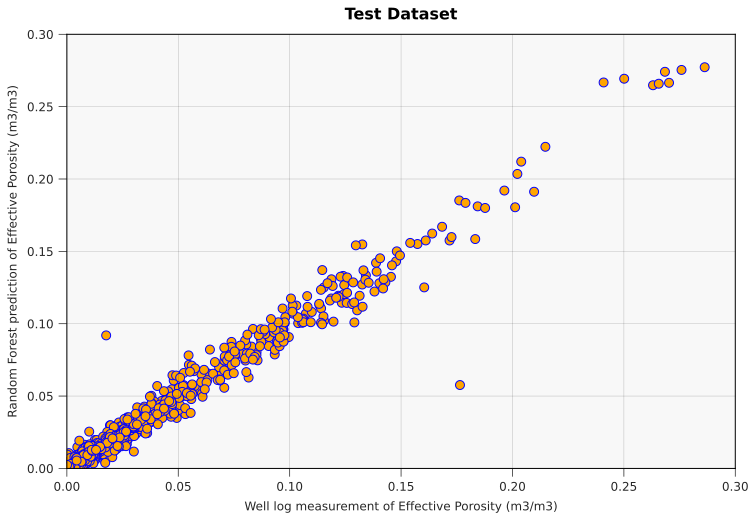

In [35]:
# Random Forest Scatter Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))

#Set up the subplot grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# One Scatter Plot
ax1.scatter(y_test, y_pred_rf, s=80, c='orange', edgecolors='blue')
ax1.set_xlabel('Well log measurement of Effective Porosity (m3/m3)', fontsize=12) 
ax1.set_ylabel('Random Forest prediction of Effective Porosity (m3/m3)', fontsize=12)
ax1.set_title('Test Dataset', fontsize=16, fontweight='bold')
ax1.set_xlim(0,0.3)
ax1.set_ylim(0,0.3)

# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.5)

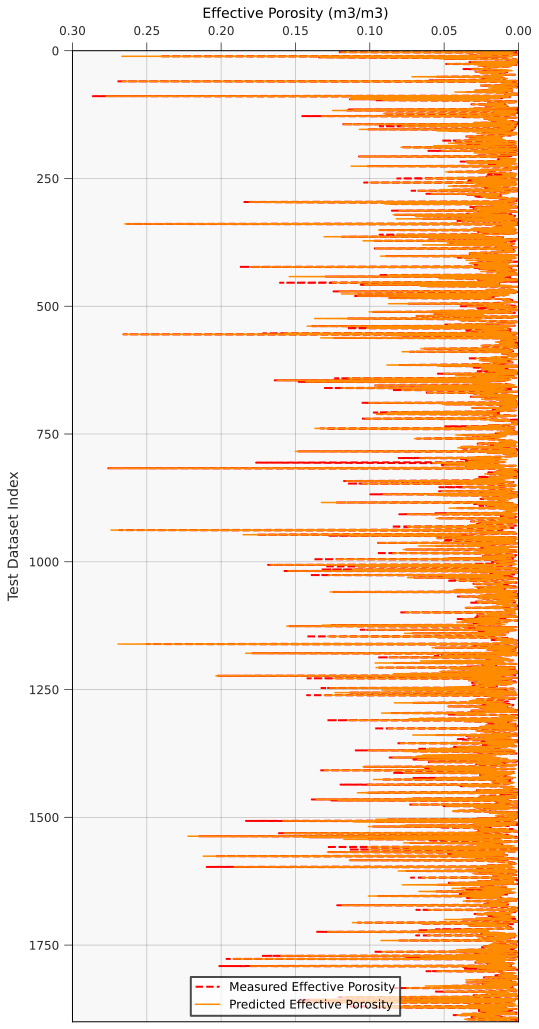

In [36]:
# Another way to perform comparison between the well log measurements and the predicted values 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,20))
fig.subplots_adjust(top=0.8)

# Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

x_ax = range(len(X_test))

# One plot
ax1.plot(y_test, x_ax, color = "red", lw = 2, linestyle = '--')
ax1.plot(y_pred_rf, x_ax, color = "darkorange", lw = 1.5, linestyle = '-')  
ax1.set_xlabel('Effective Porosity (m3/m3)',fontsize=14, color='black') 
ax1.set_ylabel('Test Dataset Index',fontsize=14)
legend1 = ax1.legend(["Measured Effective Porosity", "Predicted Effective Porosity"], loc= 'lower center',fontsize='large', framealpha=0.7)

# Set xlim() and ylim()
ax1.set_xlim(0.3,0)
ax1.set_ylim(1900,0) 
#ax1.set_ylim(750,500)   # We zoom on a specific interval 
    
# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.7)
    
# Set border properties of the legend 
legend1.get_frame().set_linewidth(2)
legend1.get_frame().set_edgecolor('black')
    
# Set xlabel and xticks position 
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")

**GRADIENT BOOSTING MODEL**

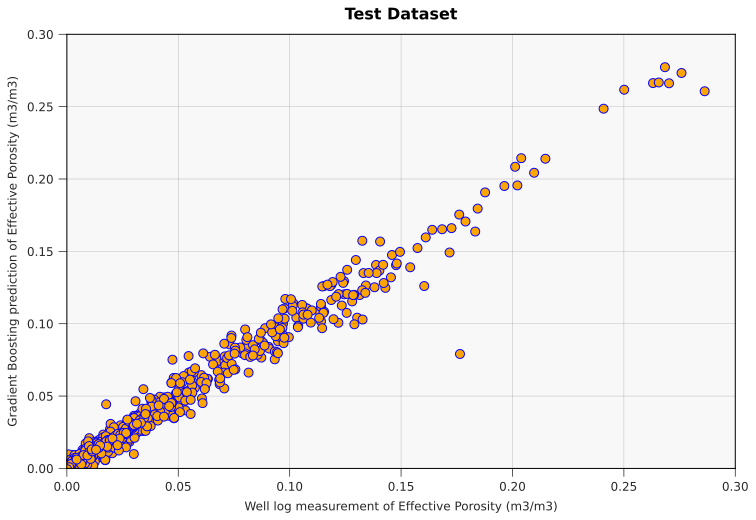

In [37]:
# Gradient Boosting Scatter Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))

#Set up the subplot grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# One Scatter Plot
ax1.scatter(y_test, y_pred_gb, s=80, c='orange', edgecolors='blue')
ax1.set_xlabel('Well log measurement of Effective Porosity (m3/m3)', fontsize=12) 
ax1.set_ylabel('Gradient Boosting prediction of Effective Porosity (m3/m3)', fontsize=12)
ax1.set_title('Test Dataset', fontsize=16, fontweight='bold')
ax1.set_xlim(0,0.3)
ax1.set_ylim(0,0.3)

# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.5)

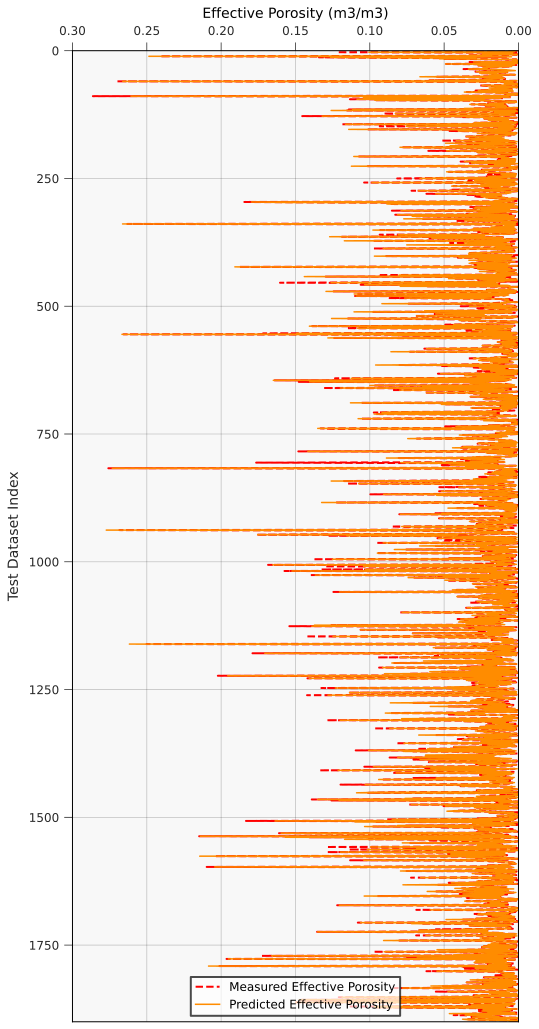

In [38]:
# Another way to perform comparison between the well log measurements and the predicted values 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,20))
fig.subplots_adjust(top=0.8)

# Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

x_ax = range(len(X_test))

# One plot
ax1.plot(y_test, x_ax, color = "red", lw = 2, linestyle = '--')
ax1.plot(y_pred_gb, x_ax, color = "darkorange", lw = 1.5, linestyle = '-')  
ax1.set_xlabel('Effective Porosity (m3/m3)',fontsize=14, color='black') 
ax1.set_ylabel('Test Dataset Index',fontsize=14)
legend1 = ax1.legend(["Measured Effective Porosity", "Predicted Effective Porosity"], loc= 'lower center',fontsize='large', framealpha=0.7)

# Set xlim() and ylim()
ax1.set_xlim(0.3,0)
ax1.set_ylim(1900,0) 
#ax1.set_ylim(750,500)   # We zoom on a specific interval 
    
# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.7)
    
# Set border properties of the legend 
legend1.get_frame().set_linewidth(2)
legend1.get_frame().set_edgecolor('black')
    
# Set xlabel and xticks position 
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")

<span style='color:crimson'> <span style="font-size:19px;"> **Performance Regression/Evaluation Metrics**

Beside the "Accuracy score" which, in this case, is the "Coefficient of Determination (r2)", we can assess the goodness of fit of the models with the following Regression Metrics, by considering only the Test Dataset:

In [39]:
# Random Forest Model

r2 = r2_score(y_test, y_pred_rf)
r2 = round(r2,4)
r2 = r2*100
print("Coefficient of Determination:", r2)

rmse = mean_squared_error(y_test, y_pred_rf, squared = False) # By default squared is True. If True returns MSE value, if False returns RMSE value
rmse = round(rmse,4)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(y_test, y_pred_rf, squared = True)
mse = round(mse,4)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred_rf)
mae = round(mae,4)
print("Mean Absolute Error:", mae)

Coefficient of Determination: 97.85000000000001
Root Mean Squared Error: 0.0053
Mean Squared Error: 0.0
Mean Absolute Error: 0.0024


In [40]:
# Gradient Boosting Model 

r2 = r2_score(y_test, y_pred_gb)
r2 = round(r2,4)
r2 = r2*100
print("Coefficient of Determination:", r2)

rmse = mean_squared_error(y_test, y_pred_gb, squared = False) # By default squared is True. If True returns MSE value, if False returns RMSE value
rmse = round(rmse,4)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(y_test, y_pred_gb, squared = True)
mse = round(mse,4)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred_gb)
mae = round(mae,4)
print("Mean Absolute Error:", mae)

Coefficient of Determination: 98.15
Root Mean Squared Error: 0.0049
Mean Squared Error: 0.0
Mean Absolute Error: 0.0025


<span style='color:crimson'> <span style="font-size:19px;"> **Selection of the Best Model**

We can conclude that "for this specific Dataset, the best model is: **Gradient Boosting**". This is because it has higher accuracy and lower error.

<span style='color:crimson'> <span style="font-size:19px;"> **Feature Importance**

It is also possible to determine the most important "predictor", for each model, thanks to the "feature_importances" variable. 

In [41]:
# Random Forest Model
features_rf=np.round(rf_final_model.feature_importances_,4)
features_rf

array([0.0626, 0.1807, 0.7567])

In [42]:
# Gradient Boosting Model 
features_gb=np.round(gb_final_model.feature_importances_,4)
features_gb

array([0.0723, 0.1733, 0.7544])

In both cases, we can observe that the most relevant "Predictor" in the calculation of the Effective Porosity is the Grain Density Log. 

<span style='color:crimson'> <span style="font-size:19px;"> **Save and Load the Random Forest & Gradient Boosting Models**

After training the Machine Learning Models, we need to save them for future use (future predictions). 

We use the "pickle" library thats allows to save and load the ML models. 

In [43]:
import pickle  # Library for save and load scikit-learn models

**RANDOM FOREST MODEL**

In [44]:
# Define file name. ".pickle" as file extension. A pickle file is a binary file. 
filename = "random_forest.pickle"

# Save Random Forest Model by means of "pickle.dump" function to store the object data to the file. 
# This function takes 2 arguments:
# Object that you want to store.
# File object you get by opening the desired file in write-binary (wb) mode.
pickle.dump(rf_final_model, open(filename, "wb"))

# Load Random Forest Model by means of the "pickle.load" function.
# The primary argument of the function is the file object you get by opening the desired file in read-binary (rb) mode.
random_forest_model_loaded = pickle.load(open(filename, "rb")) 

In [45]:
# To print the trained and tuned random forest model 
print(random_forest_model_loaded)

RandomForestRegressor(max_depth=20, n_estimators=250, random_state=42)


In [46]:
# You can use the loaded model to compute predictions
# We perform the prediction on the entire original dataset 

predictors = ["GR", "NPHI", "RHGX_HILT"]      
X = df[predictors]

y = df["PHIE_HILT"]                                      

In [47]:
y_predicted_rf = random_forest_model_loaded.predict(X)

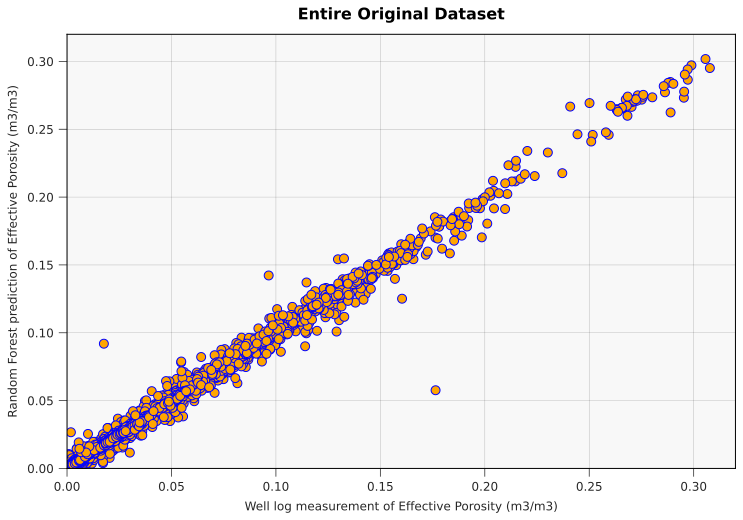

In [48]:
# Random Forest Scatter Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))

#Set up the subplot grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# One Scatter Plot
ax1.scatter(y, y_predicted_rf, s=80, c='orange', edgecolors='blue')
ax1.set_xlabel('Well log measurement of Effective Porosity (m3/m3)', fontsize=12) 
ax1.set_ylabel('Random Forest prediction of Effective Porosity (m3/m3)', fontsize=12)
ax1.set_title('Entire Original Dataset', fontsize=16, fontweight='bold')
ax1.set_xlim(0,0.32)
ax1.set_ylim(0,0.32)

# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.5)

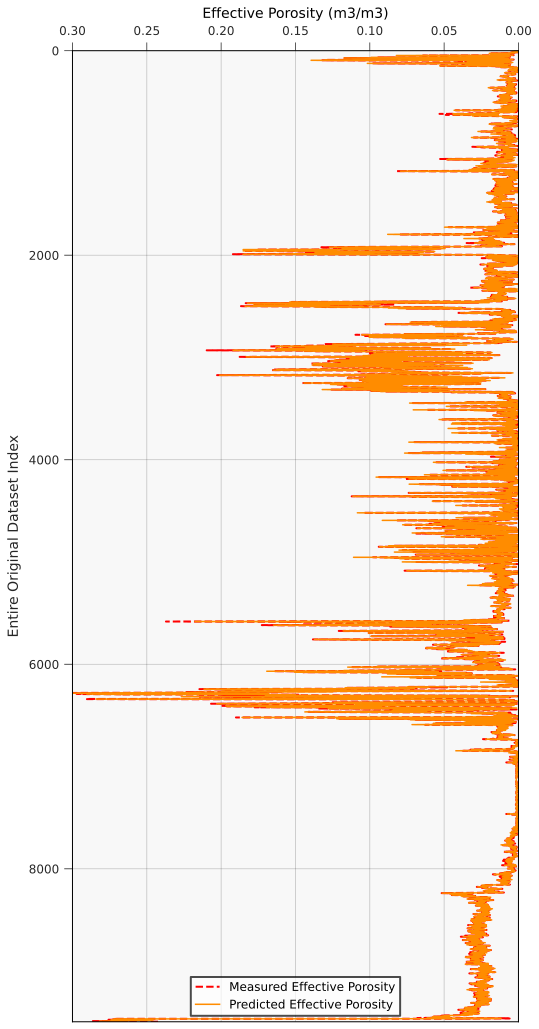

In [49]:
# Another way to perform comparison between the well log measurements and the predicted values 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,20))
fig.subplots_adjust(top=0.8)

# Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

x_ax = range(len(X))

# One plot
ax1.plot(y, x_ax, color = "red", lw = 2, linestyle = '--')
ax1.plot(y_predicted_rf, x_ax, color = "darkorange", lw = 1.5, linestyle = '-')  
ax1.set_xlabel('Effective Porosity (m3/m3)',fontsize=14, color='black') 
ax1.set_ylabel('Entire Original Dataset Index',fontsize=14)
legend1 = ax1.legend(["Measured Effective Porosity", "Predicted Effective Porosity"], loc= 'lower center',fontsize='large', framealpha=0.7)

# Set xlim() and ylim()
ax1.set_xlim(0.3,0)
ax1.set_ylim(9496,0) 
#ax1.set_ylim(6000,5000)   # We zoom on a specific interval 
    
# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.7)
    
# Set border properties of the legend 
legend1.get_frame().set_linewidth(2)
legend1.get_frame().set_edgecolor('black')
    
# Set xlabel and xticks position 
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")

**GRADIENT BOOSTING MODEL**

In [50]:
# Define file name. ".pickle" as file extension.
filename = "gradient_boosting.pickle"

# Save Gradient Boosting Model by means of "pickle.dump" function to store the object data to the file. 
pickle.dump(gb_final_model, open(filename, "wb"))

# Load Gradient Boosting Model by means of the "pickle.load" function.
gradient_boosting_model_loaded = pickle.load(open(filename, "rb")) 

In [51]:
# Print the trained and tuned random forest model 
print(gradient_boosting_model_loaded)

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, n_estimators=250,
                          random_state=42)


In [52]:
# You can use the loaded model to compute predictions
# We perform the prediction on the entire original dataset 

predictors = ["GR", "NPHI", "RHGX_HILT"]      
X = df[predictors]

y = df["PHIE_HILT"]                                      

In [53]:
y_predicted_gb = gradient_boosting_model_loaded.predict(X)

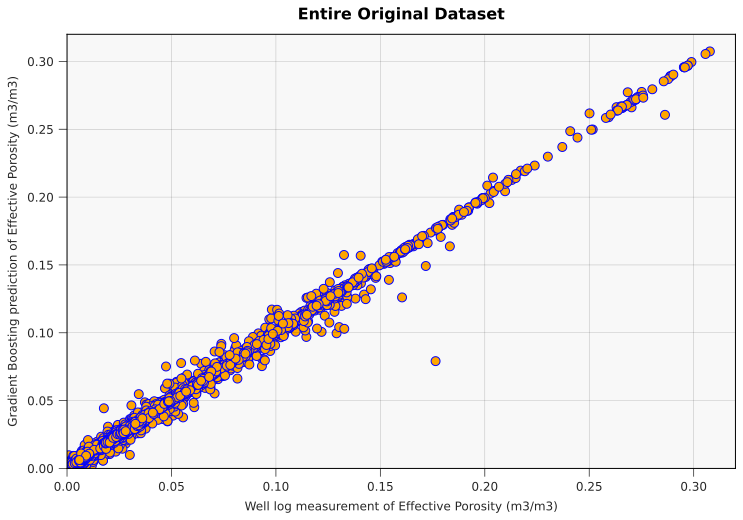

In [54]:
# Random Forest Scatter Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))

#Set up the subplot grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# One Scatter Plot
ax1.scatter(y, y_predicted_gb, s=80, c='orange', edgecolors='blue')
ax1.set_xlabel('Well log measurement of Effective Porosity (m3/m3)', fontsize=12) 
ax1.set_ylabel('Gradient Boosting prediction of Effective Porosity (m3/m3)', fontsize=12)
ax1.set_title('Entire Original Dataset', fontsize=16, fontweight='bold')
ax1.set_xlim(0,0.32)
ax1.set_ylim(0,0.32)

# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.5)

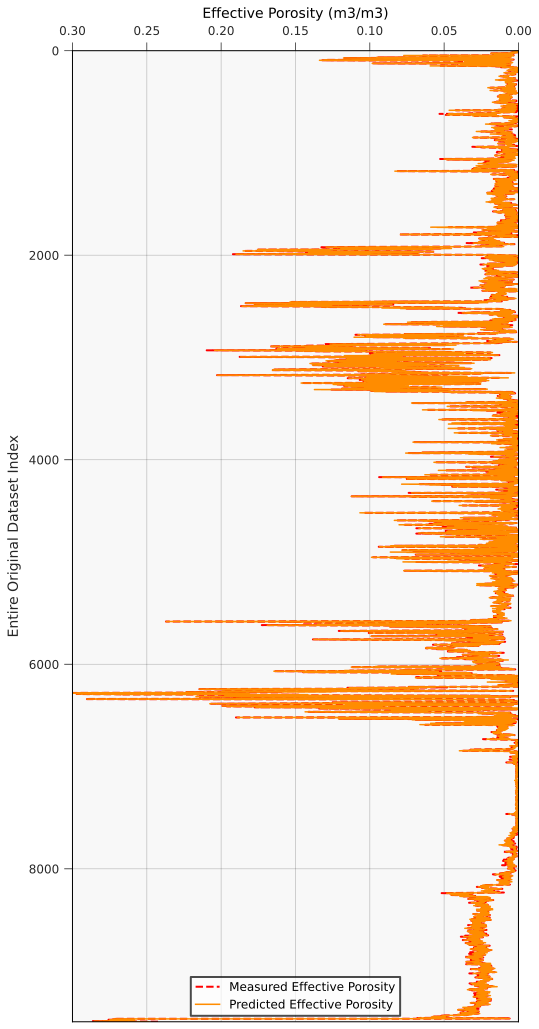

In [55]:
# Another way to perform comparison between the well log measurements and the predicted values 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,20))
fig.subplots_adjust(top=0.8)

# Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

x_ax = range(len(X))

# One plot
ax1.plot(y, x_ax, color = "red", lw = 2, linestyle = '--')
ax1.plot(y_predicted_gb, x_ax, color = "darkorange", lw = 1.5, linestyle = '-')  
ax1.set_xlabel('Effective Porosity (m3/m3)',fontsize=14, color='black') 
ax1.set_ylabel('Entire Original Dataset Index',fontsize=14)
legend1 = ax1.legend(["Measured Effective Porosity", "Predicted Effective Porosity"], loc= 'lower center',fontsize='large', framealpha=0.7)

# Set xlim() and ylim()
ax1.set_xlim(0.3,0)
ax1.set_ylim(9496,0) 
#ax1.set_ylim(6000,5000)   # We zoom on a specific interval 
    
# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.7)
    
# Set border properties of the legend 
legend1.get_frame().set_linewidth(2)
legend1.get_frame().set_edgecolor('black')
    
# Set xlabel and xticks position 
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")

<span style='color:crimson'> <span style="font-size:19px;"> **Applying the Saved ML Models to WELL 1-BRSA-948-MG**

In this case, we want to predict Effective Porosity (PHIE_HILT) log for WELL 1-BRSA-948-MG, by applying the predictive machine learning models that have been trained and tuned on WELL 1-BRSA-871-MG.

In [56]:
# Load the csv well log data to Pandas DataFrame 
df1 = pd.read_csv("well_log_data1.csv")
df1

DEPTH     DEPTH1     BS      CS    TENS        ETIM  PXND_HILT  \
0     413580.0  1050.4932  12.25  1031.0  1960.0     0.00000    0.10738   
1     413520.0  1050.3408  12.25  1031.0  1960.0     0.00000    0.10738   
2     413460.0  1050.1884  12.25  1031.0  1960.0     0.00000    0.10738   
3     413400.0  1050.0360  12.25  1031.0  1960.0     0.00000    0.10739   
4     413340.0  1049.8836  12.25  1031.0  1960.0     0.00000    0.10740   
...        ...        ...    ...     ...     ...         ...        ...   
1283  336540.0   854.8116  12.25  1619.0  1691.0  1516.62000    0.07741   
1284  336480.0   854.6592  12.25  1621.0  1707.0  1517.73804    0.07741   
1285  336420.0   854.5068  12.25  1622.0  1684.0  1518.83997    0.07741   
1286  336360.0   854.3544  12.25  1622.0  1673.0  1519.95801    0.07741   
1287  336300.0   854.2020  12.25  1622.0  1695.0  1521.05896    0.07741   

      RHGX_HILT  UMA_HILT  HPATT  ...    ELSZ_3     HWEC          DF  \
0       3.03590  12.76045    8.0  ...  26.35226  0.00000  3567.50952   
1       3.03590  12.76051    8.0  ...  26.35109  0.00000  3567.50952   
2       3.03590  12.76055    8.0  ...  26.35208  0.00000  3567.50952   
3       3.03587  12.76012    8.0  ...  26.35253  0.00000  3567.50952   
4       3.03583  12.75963    8.0  ...  26.35402  0.00000  3567.50952   
...         ...       ...    ...  ...       ...      ...         ...   
1283    2.85475  11.19793    8.0  ...  -1.90363  0.03648  3259.14771   
1284    2.85475  11.19793    8.0  ...  -1.90363  0.10025  3259.14771   
1285    2.85475  11.19793    8.0  ...  -1.90363  0.04507  3263.89160   
1286    2.85475  11.19793    8.0  ...  -1.90363  0.06251  3255.98511   
1287    2.85475  11.19793    8.0  ...  -1.90363  0.04154  3244.91553   

             CDF     AREA     AFCD      ABS       IHV      ICV      AHTCA  
0     3567.50952  0.07463  0.04694  0.07604   0.97808  0.36287  130.85487  
1     3567.50952  0.07463  0.04694  0.07604   0.98946  0.36709  130.85487  
2     3567.50952  0.07463  0.04694  0.07604   1.00083  0.37131  130.85487  
3     3567.50952  0.07463  0.04694  0.07604   1.01220  0.37553  130.85487  
4     3567.50952  0.07463  0.04694  0.07604   1.02358  0.37975  130.85487  
...          ...      ...      ...      ...       ...      ...        ...  
1283  3259.14771  0.05467  0.04694  0.07604  15.39349  5.59291  131.44562  
1284  3259.14771  0.05111  0.04694  0.07604  15.40128  5.59354  131.44695  
1285  3263.89160  0.04731  0.04694  0.07604  15.40849  5.59360  131.51225  
1286  3255.98511  0.04351  0.04694  0.07604  15.41512  5.59308  131.44797  
1287  3244.91553  0.04351  0.04694  0.07604  15.41512  5.59308  131.46410  

[1288 rows x 79 columns]

**RANDOM FOREST MODEL**

In [57]:
# Load the trained and tuned Random Forest Model 
RandomForestModel = pd.read_pickle('random_forest.pickle')

In [58]:
# Print the Model 
RandomForestModel

RandomForestRegressor(max_depth=20, n_estimators=250, random_state=42)

In [59]:
# Compute new predictions by using the "unseen data" of WELL 1-BRSA-948-MG

predictors = ["GR","NPHI","RHGX_HILT"]  

X = df1[predictors]
y = df1["PHIE_HILT"]

In [60]:
# New prediction on the entire dataset
y_predicted_rf1 = RandomForestModel.predict(X)

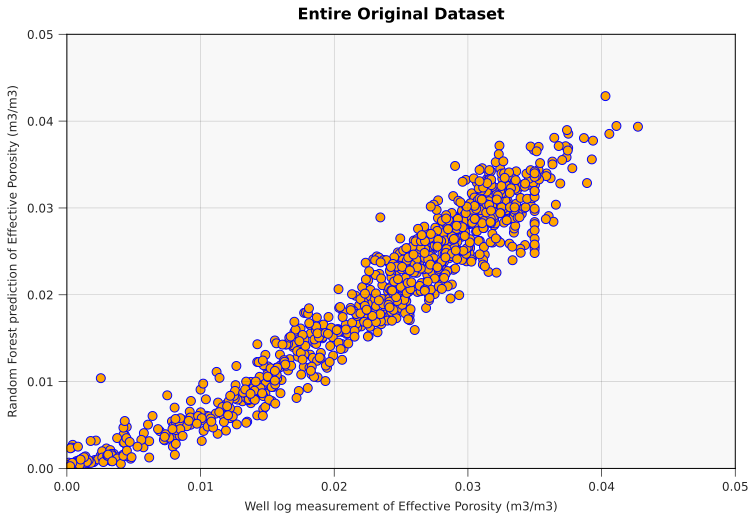

In [61]:
# Random Forest Scatter Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))

#Set up the subplot grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# One Scatter Plot
ax1.scatter(y, y_predicted_rf1, s=80, c='orange', edgecolors='blue')
ax1.set_xlabel('Well log measurement of Effective Porosity (m3/m3)', fontsize=12) 
ax1.set_ylabel('Random Forest prediction of Effective Porosity (m3/m3)', fontsize=12)
ax1.set_title('Entire Original Dataset', fontsize=16, fontweight='bold')
ax1.set_xlim(0,0.05)
ax1.set_ylim(0,0.05)

# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.5)

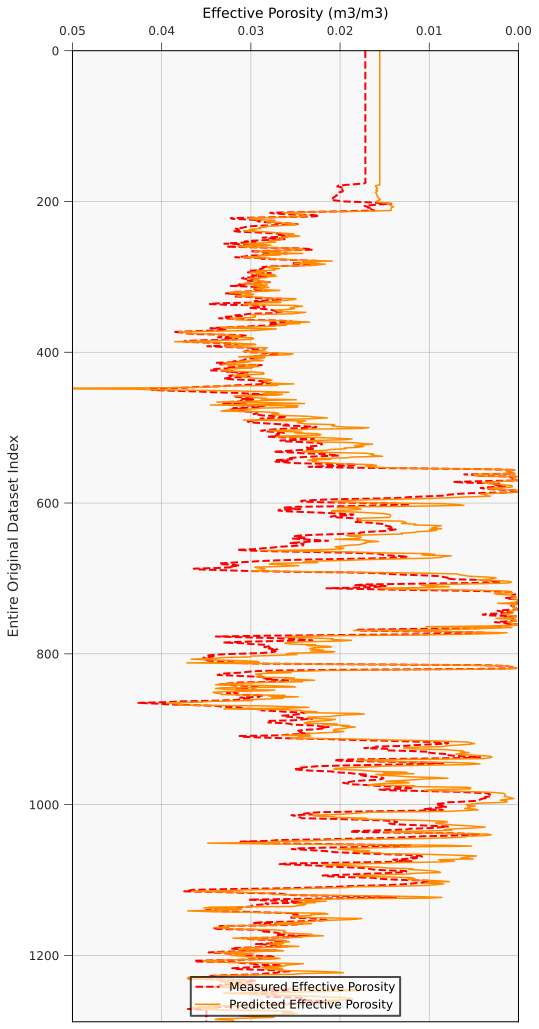

In [62]:
# Another way to perform comparison between the well log measurements and the predicted values 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,20))
fig.subplots_adjust(top=0.8)

# Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

x_ax = range(len(X))

# One plot
ax1.plot(y, x_ax, color = "red", lw = 2, linestyle = '--')
ax1.plot(y_predicted_rf1, x_ax, color = "darkorange", lw = 1.5, linestyle = '-')  
ax1.set_xlabel('Effective Porosity (m3/m3)',fontsize=14, color='black') 
ax1.set_ylabel('Entire Original Dataset Index',fontsize=14)
legend1 = ax1.legend(["Measured Effective Porosity", "Predicted Effective Porosity"], loc= 'lower center',fontsize='large', framealpha=0.7)

# Set xlim() and ylim()
ax1.set_xlim(0.05,0)
ax1.set_ylim(1288,0) 
#ax1.set_ylim(,)         # We zoom on a specific interval 
    
# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.7)
    
# Set border properties of the legend 
legend1.get_frame().set_linewidth(2)
legend1.get_frame().set_edgecolor('black')
    
# Set xlabel and xticks position 
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")

**GRADIENT BOOSTING MODEL**

In [63]:
# Load the trained and tuned Gradient Boosting Model
GradientBoostingModel = pd.read_pickle('gradient_boosting.pickle')

In [64]:
# Print the Model 
GradientBoostingModel

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, n_estimators=250,
                          random_state=42)

In [65]:
# Compute new predictions by using the "unseen data" of WELL 1-BRSA-948-MG

predictors = ["GR","NPHI","RHGX_HILT"]  

X = df1[predictors]
y = df1["PHIE_HILT"]

In [66]:
y_predicted_gb1 = GradientBoostingModel.predict(X)

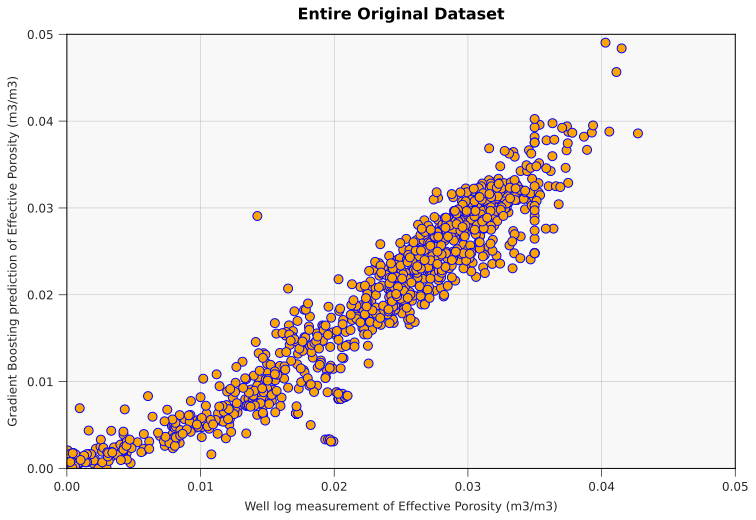

In [67]:
# Random Forest Scatter Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))

#Set up the subplot grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# One Scatter Plot
ax1.scatter(y, y_predicted_gb1, s=80, c='orange', edgecolors='blue')
ax1.set_xlabel('Well log measurement of Effective Porosity (m3/m3)', fontsize=12) 
ax1.set_ylabel('Gradient Boosting prediction of Effective Porosity (m3/m3)', fontsize=12)
ax1.set_title('Entire Original Dataset', fontsize=16, fontweight='bold')
ax1.set_xlim(0,0.05)
ax1.set_ylim(0,0.05)

# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.5)


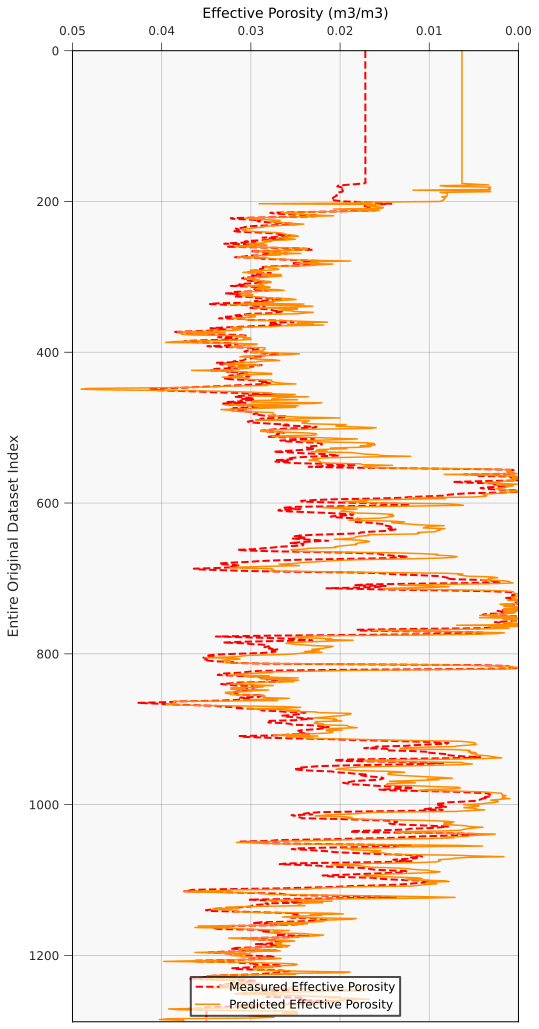

In [68]:
# Another way to perform comparison between the well log measurements and the predicted values 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,20))
fig.subplots_adjust(top=0.8)

# Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

x_ax = range(len(X))

# One plot
ax1.plot(y, x_ax, color = "red", lw = 2, linestyle = '--')
ax1.plot(y_predicted_gb1, x_ax, color = "darkorange", lw = 1.5, linestyle = '-')  
ax1.set_xlabel('Effective Porosity (m3/m3)',fontsize=14, color='black') 
ax1.set_ylabel('Entire Original Dataset Index',fontsize=14)
legend1 = ax1.legend(["Measured Effective Porosity", "Predicted Effective Porosity"], loc= 'lower center',fontsize='large', framealpha=0.7)

# Set xlim() and ylim()
ax1.set_xlim(0.05,0)
ax1.set_ylim(1288,0) 
#ax1.set_ylim(,)         # We zoom on a specific interval 
    
# Add a black border to each subplot
ax1.spines['top'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
    
# Set font size of the tick labels
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
    
# Set grid 
ax1.grid(color='black',lw=0.7)
    
# Set border properties of the legend 
legend1.get_frame().set_linewidth(2)
legend1.get_frame().set_edgecolor('black')
    
# Set xlabel and xticks position 
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")

<span style='color:crimson'> <span style="font-size:19px;"> **Performance Regression/Evaluation Metrics**

**RANDOM FOREST MODEL**

In [69]:
r2 = r2_score(y, y_predicted_rf1)
r2 = round(r2,4)
r2 = r2*100
print("Coefficient of Determination:", r2)

rmse = mean_squared_error(y, y_predicted_rf1, squared = False) # By default squared is True. If True returns MSE value, if False returns RMSE value
rmse = round(rmse,4)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(y, y_predicted_rf1, squared = True)
mse = round(mse,4)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y, y_predicted_rf1)
mae = round(mae,4)
print("Mean Absolute Error:", mae)

Coefficient of Determination: 84.78
Root Mean Squared Error: 0.0036
Mean Squared Error: 0.0
Mean Absolute Error: 0.0029


**GRADIENT BOOSTING MODEL**

In [70]:
r2 = r2_score(y, y_predicted_gb1)
r2 = round(r2,4)
r2 = r2*100
print("Coefficient of Determination:", r2)

rmse = mean_squared_error(y, y_predicted_gb1, squared = False) # By default squared is True. If True returns MSE value, if False returns RMSE value
rmse = round(rmse,4)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(y, y_predicted_gb1, squared = True)
mse = round(mse,4)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y, y_predicted_gb1)
mae = round(mae,4)
print("Mean Absolute Error:", mae)

Coefficient of Determination: 62.32
Root Mean Squared Error: 0.0057
Mean Squared Error: 0.0
Mean Absolute Error: 0.0044


**Final Comment**: the Random Forest Model has a higher predictive power with respect to the Gradient Boosting Model, for this specific dataset. 